# Análise Exploratória: Síntese

In [128]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# ignora os warnings 
import warnings
warnings.filterwarnings("ignore")
# Por se tratar de um conjunto de gráficos menores, pode ser mais interessante gerar os gráficos em janela separada
%matplotlib inline

In [129]:
# Leitura do arquivo CSV com separador "," e codificação UTF-8
# diabetes é uma variável que recebe a leitura do arquivo nos parâmetros definidos
diabetes = pd.read_csv('arquivo.csv', sep = ';', encoding = 'UTF-8')

In [130]:
# Mostra dois registros do arquivo
diabetes.head(10)

,RIDAGEYR,LBXSGL,LBXGH,BMXWT,BMXHT,BMXWAIST,CLASSE
0,79,98,6.0,71.7,172.2,94.7,1
1,68,77,8.3,81.7,181.2,100.8,1
2,65,120,6.9,89.7,171.7,103.6,1
3,78,126,6.6,80.9,166.6,115.3,1
4,77,89,5.6,170.8,174.7,-1.0,1
5,52,75,5.8,69.0,155.0,88.3,1
6,50,212,7.3,90.8,171.6,105.3,1
7,69,272,10.3,92.0,167.1,106.9,1
8,80,153,6.6,-1.0,175.0,-1.0,1
9,71,197,7.7,99.4,170.1,120.9,1


In [131]:
# apresenta os tipas de dados das colunas
diabetes.dtypes

RIDAGEYR      int64
LBXSGL        int64
LBXGH       float64
BMXWT       float64
BMXHT       float64
BMXWAIST    float64
CLASSE        int64
dtype: object

In [132]:
# Mostra o shape do dataset
diabetes.shape

(3940, 7)

In [133]:
# Resumo estatístico do dataset completo
diabetes.describe()

,RIDAGEYR,LBXSGL,LBXGH,BMXWT,BMXHT,BMXWAIST,CLASSE
count,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000
mean,53.681218,121.589086,6.349340,82.087944,161.324822,96.685228,0.500000
std,19.553986,67.940048,2.179926,27.662947,28.680957,31.024922,0.500063
min,7.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,41.000000,88.000000,5.400000,66.400000,157.700000,87.575000,0.000000
50%,59.000000,100.000000,6.000000,80.100000,165.000000,101.200000,0.500000
75%,69.000000,139.000000,7.200000,96.525000,172.825000,114.000000,1.000000
max,80.000000,626.000000,17.500000,219.600000,195.800000,169.600000,1.000000


In [134]:
# Resumo estatístico de cada classe - Classe 1
diabetes[diabetes.CLASSE == 1].describe()

,RIDAGEYR,LBXSGL,LBXGH,BMXWT,BMXHT,BMXWAIST,CLASSE
count,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.0
mean,62.496954,141.814213,6.938985,84.099594,156.609695,95.549188,1.0
std,12.910216,83.515477,2.778848,31.849053,38.743765,40.064160,0.0
min,7.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.0
25%,55.000000,99.000000,6.200000,69.900000,156.400000,92.400000,1.0
50%,64.000000,129.000000,7.000000,83.950000,164.500000,105.700000,1.0
75%,72.000000,178.000000,8.175000,100.300000,172.600000,117.500000,1.0
max,80.000000,577.000000,17.500000,219.600000,195.400000,169.600000,1.0


In [135]:
# Resumo estatístico de cada classe - Classe 0
diabetes[diabetes.CLASSE == 0].describe()

,RIDAGEYR,LBXSGL,LBXGH,BMXWT,BMXHT,BMXWAIST,CLASSE
count,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.0
mean,44.865482,101.363959,5.759695,80.076294,166.039949,97.821269,0.0
std,21.041005,37.956325,1.043483,22.547865,10.002283,17.828657,0.0
min,12.000000,58.000000,-1.000000,30.300000,139.700000,56.400000,0.0
25%,26.000000,86.000000,5.225000,63.925000,158.800000,85.000000,0.0
50%,45.000000,92.000000,5.500000,77.000000,165.400000,96.900000,0.0
75%,62.000000,101.000000,5.900000,92.300000,173.200000,109.000000,0.0
max,80.000000,626.000000,14.300000,185.000000,195.800000,169.500000,0.0


A correlação é o relacionamento entre 2 variáveis. O método mais comum para calcular correlação é o método de Pearson, que assume uma distribuição normal dos dados. Correlação de -1 mostra uma correlação negativa, enquanto uma correlação de +1 mostra uma correlação positiva. Uma correlação igual a 0 mostra que não há relacionamento entre as variáveis.

Alguns algoritmos como regressão linear e regressão logística podem apresentar problemas de performance se houver atributos altamente correlacionados (colineares).

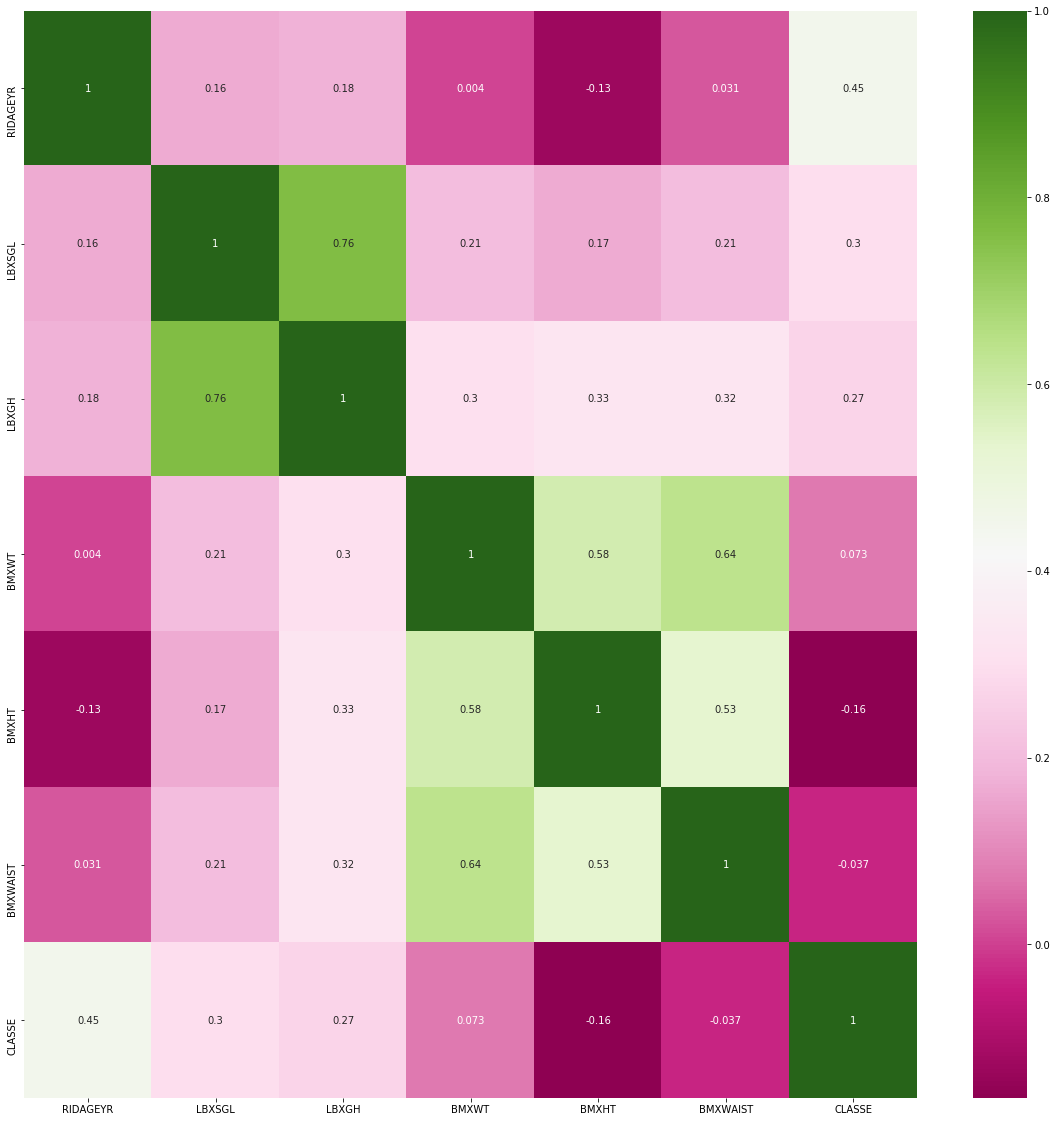

In [136]:
# Cria mapa de calor com a correlação do dataset com o mapa ce cores PiYG
# Aumenta o tamanho da figura a ser exibida
plt.figure(figsize=(20,20))
sns.heatmap(diabetes.corr(), annot=True, cmap = "PiYG")

### <font size = '2'>prof. Dr. Ivan Carlos Alcântara de Oliveira</font> - <font color="blue">https://orcid.org/0000-0002-6020-7535</font>